In [461]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [462]:
df = pd.read_csv('./Pokemon.csv')
df2 =  df.sort_values("Type 1")
df.head(1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


In [463]:
number_of_Water = 50
number_of_normal = 50

total_train = number_of_Water + number_of_normal

df2.head()
df2 = df[df['Type 1'] =='Water']
df_water_train = df2.iloc[0:number_of_Water]
df_water_test = df2.iloc[60:112]

df3 = df[df['Type 1'] =='Normal']
df_Normal_train = df3.iloc[0:number_of_normal]
df_Normal_test = df3.iloc[50:98]

train = pd.concat([df_water_train,df_Normal_train],axis=0)
test = pd.concat([df_water_test,df_Normal_test],axis=0)

In [464]:
a = (train['Type 1']=='Water').values
a.shape
train.head(100)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
59,54,Psyduck,Water,NaN,320,50,52,48,65,50,55,1,False
60,55,Golduck,Water,NaN,500,80,82,78,95,80,85,1,False
65,60,Poliwag,Water,NaN,300,40,50,40,40,40,90,1,False
66,61,Poliwhirl,Water,NaN,385,65,65,65,50,50,90,1,False
67,62,Poliwrath,Water,Fighting,510,90,95,95,70,90,70,1,False
78,72,Tentacool,Water,Poison,335,40,40,35,50,100,70,1,False


In [465]:
y_heat=[]
for i in range(len(a)):
    if a[i]==True :
        y_heat.append(1)
    else :
        y_heat.append(0)
        
y_heat

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [466]:
Total_matrix_water =   np.array(train['Total'])
HP_matrix_water =      np.array(train['HP'])
Attack_matrix_water =  np.array(train['Attack'])
Defense_matrix_water = np.array(train['Defense'])
SpAtk_matrix_water =   np.array(train['Sp. Atk'])
SpDef_matrix_water =   np.array(train['Sp. Def'])
Speed_matrix_water =   np.array(train['Speed'])

train_data = np.vstack((Total_matrix_water,
                            HP_matrix_water,
                            Attack_matrix_water,
                            Defense_matrix_water,
                            SpAtk_matrix_water,
                            SpDef_matrix_water,
                            Speed_matrix_water)).T

train_data[0]

array([314,  44,  48,  65,  50,  64,  43], dtype=int64)

In [467]:
Total_matrix_water =   np.array(test['Total'])
HP_matrix_water =      np.array(test['HP'])
Attack_matrix_water =  np.array(test['Attack'])
Defense_matrix_water = np.array(test['Defense'])
SpAtk_matrix_water =   np.array(test['Sp. Atk'])
SpDef_matrix_water =   np.array(test['Sp. Def'])
Speed_matrix_water =   np.array(test['Speed'])

test_data = np.vstack((Total_matrix_water,
                            HP_matrix_water,
                            Attack_matrix_water,
                            Defense_matrix_water,
                            SpAtk_matrix_water,
                            SpDef_matrix_water,
                            Speed_matrix_water)).T

test_data[0]

array([560,  70, 140,  70, 110,  65, 105], dtype=int64)

In [551]:
lr = 0.001 # learning rate
iteration = 4
w = [-0.00488281,-0.01660156,-0.01098633,0.015625,0.04785156,0.01245117,-0.01855469]
#w = [-0.00488281-0.02,-0.01660156-0.02,-0.01098633-0.02,0.015625-0.02,0.04785156-0.02,0.01245117-0.02,-0.01855469-0.02]
b = -1.2
W = np.mat(w)
W


matrix([[-0.00488281, -0.01660156, -0.01098633,  0.015625  ,  0.04785156,
          0.01245117, -0.01855469]])

In [552]:
def discriminative(result):
    
    
    W = np.mat(w)
    for k in range(total_train):
        Z =(np.dot(W,train_data[k])+ b)
        f_w_b = 1/(1 + math.exp(-Z))
        
        
        if f_w_b > 0.5 :
            result.append('Water')
            #print('water class probability : ',f_w_b)
        else:
            result.append('Normal')
            #print('Normal class probability: ',1-f_w_b)
        
        
        
    return result

In [553]:
res = []
re = discriminative(res)
train['pre']='NaN'
train['pre'] = re
(train['Type 1'] == train['pre']).sum()

57

In [554]:
w1_lr = 0
w2_lr = 0
w3_lr = 0
w4_lr = 0
w5_lr = 0
w6_lr = 0
w7_lr = 0
b_lr  = 0
loss_history = []
error = []
for j in range(iteration) :
    print(j)
    loss = 0
    W = np.mat(w)
    W_gra_1 = 0
    W_gra_2 = 0
    W_gra_3 = 0
    W_gra_4 = 0
    W_gra_5 = 0
    W_gra_6 = 0
    W_gra_7 = 0
    b_gra = 0
    
    for k in range(total_train):
        Z =(np.dot(W,train_data[k])+ b)
        f_w_b = 1/(1 + math.exp(-Z))
        loss =  loss - ((y_heat[k]*np.log(f_w_b)) + ((1-y_heat[k])*np.log(1-f_w_b)))
        
        W_gra_1 = W_gra_1 + (f_w_b-y_heat[k])*train_data[k][0] 
        W_gra_2 = W_gra_2 + (f_w_b-y_heat[k])*train_data[k][1]
        W_gra_3 = W_gra_3 + (f_w_b-y_heat[k])*train_data[k][2]
        W_gra_4 = W_gra_4 + (f_w_b-y_heat[k])*train_data[k][3]
        W_gra_5 = W_gra_5 + (f_w_b-y_heat[k])*train_data[k][4]
        W_gra_6 = W_gra_6 + (f_w_b-y_heat[k])*train_data[k][5]
        W_gra_7 = W_gra_7 + (f_w_b-y_heat[k])*train_data[k][6]
        
        b_gra = b_gra + (f_w_b-y_heat[i])
        #print(f_w_b)
    
    
    w1_lr = w1_lr + W_gra_1**2
    w2_lr = w2_lr + W_gra_2**2
    w3_lr = w3_lr + W_gra_3**2
    w4_lr = w4_lr + W_gra_4**2
    w5_lr = w5_lr + W_gra_5**2
    w6_lr = w6_lr + W_gra_6**2
    w7_lr = w7_lr + W_gra_7**2
    
    b_lr = b_lr + b_gra**2
    
    
    loss_history.append(loss)
    print('loss = ',loss)
    w[0] = w[0] - lr/np.sqrt(w1_lr) * W_gra_1
    w[1] = w[1] - lr/np.sqrt(w2_lr) * W_gra_2
    w[2] = w[2] - lr/np.sqrt(w3_lr) * W_gra_3
    w[3] = w[3] - lr/np.sqrt(w4_lr) * W_gra_4
    w[4] = w[4] - lr/np.sqrt(w5_lr) * W_gra_5
    w[5] = w[5] - lr/np.sqrt(w6_lr) * W_gra_6
    w[6] = w[6] - lr/np.sqrt(w7_lr) * W_gra_7
    b = b -  lr/np.sqrt(b_lr)*b_gra
    
    res = []
    re = discriminative(res)
    test['pre']='NaN'
    test['pre'] = re
    error.append((test['Type 1'] == test['pre']).sum())
    print(w)

0
loss =  80.41459832122423
[-0.0038828099999999996, -0.01560156, -0.009986330000000002, 0.016625, 0.04885156, 0.013451169999999998, -0.017554689999999998]
1
loss =  62.66307294632072
[-0.0034142191212138246, -0.015155909154589461, -0.009504545247581538, 0.017123493861528692, 0.049277000920981556, 0.01392279690426818, -0.017078611240683536]
2
loss =  58.257269025335404
[-0.003169420144617664, -0.014955285992159706, -0.009244084333988427, 0.017420551967309256, 0.04946122201246982, 0.014174892340198768, -0.016825919362614614]
3
loss =  56.9978751211145
[-0.0030371637573377375, -0.014881728699774478, -0.009095859395288439, 0.01761927035520023, 0.04952412875692607, 0.014317869607618529, -0.016686476566339425]


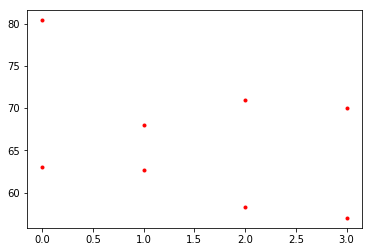

In [555]:
plt.plot(range(len(loss_history)),loss_history,'r.',range(len(loss_history)),error,'r.')

In [556]:
w

[-0.0030371637573377375,
 -0.014881728699774478,
 -0.009095859395288439,
 0.01761927035520023,
 0.04952412875692607,
 0.014317869607618529,
 -0.016686476566339425]

In [557]:
def discriminative(result):
    
    
    W = np.mat(w)
    for k in range(total_train):
        Z =(np.dot(W,test_data[k])+ b)
        f_w_b = 1/(1 + math.exp(-Z))
        
        
        if f_w_b > 0.5 :
            result.append('Water')
            #print('water class probability : ',f_w_b)
        else:
            result.append('Normal')
            #print('Normal class probability: ',1-f_w_b)
        
        
        
    return result

In [558]:
res = []
re = discriminative(res)

In [559]:
test['pre']='NaN'
test['pre'] = re
(test['Type 1'] == test['pre']).sum()

73

In [560]:
def discriminative(result):
    
    
    W = np.mat(w)
    for k in range(total_train):
        Z =(np.dot(W,train_data[k])+ b)
        f_w_b = 1/(1 + math.exp(-Z))
        
        
        if f_w_b > 0.5 :
            result.append('Water')
            #print('water class probability : ',f_w_b)
        else:
            result.append('Normal')
            #print('Normal class probability: ',1-f_w_b)
        
        
        
    return result

In [561]:
res1 = []
re1 = discriminative(res1)

In [562]:
train['pre']='NaN'
train['pre'] = re1
(train['Type 1'] == train['pre']).sum()

72